<a href="https://colab.research.google.com/github/angel-lar/Metodos-numericos/blob/main/comparativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\textbf{Comparación de interpoladores: fenómeno de runge}$

$\text{importamos librerias necesarias para todos los métodos}$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

$\text{creamos una función para q evalue la función jaja}$

In [8]:
def f(x):
    return 1 / (1 + 25 * x**2)

$\text{y una para la derivada (solo la evalua)}$

In [9]:
def derivada(x):
    return -50 * x / (1 + 25 * x**2)**2

$\text{ahora colocamos la función de mi programa de hermite}$

In [10]:
def hermite(x, fx, dfx):
    n = len(x)
    z = [0] * (2 * n)
    Q = [[0 for _ in range(2 * n)] for _ in range(2 * n)]

    for i in range(n):
        z[2 * i] = z[2 * i + 1] = x[i]
        Q[2 * i][0] = fx[i]
        Q[2 * i + 1][0] = fx[i]
        Q[2 * i + 1][1] = dfx[i]
        if i != 0:
            Q[2 * i][1] = (Q[2 * i][0] - Q[2 * i - 1][0]) / (z[2 * i] - z[2 * i - 1])
        else:
            Q[0][1] = dfx[0]

    for i in range(2, 2 * n):
        for j in range(2, i + 1):
            Q[i][j] = (Q[i][j - 1] - Q[i - 1][j - 1]) / (z[i] - z[i - j])
    return z, Q

$\text{posteriormente con Lagrange y Newton}$

In [11]:
def lagrange(puntos):
    x = sp.Symbol('x')
    n = len(puntos)
    polinomio = 0
    for i in range(n):
        xi, yi = puntos[i]
        termino = yi
        for j in range(n):
            if i != j:
                xj, _ = puntos[j]
                termino *= (x - xj) / (xi - xj)
        polinomio += termino
    return sp.expand(polinomio)

In [12]:
def DDN(x, y):
    n = len(x)
    tabla = np.zeros((n, n))
    tabla[:, 0] = y
    for i in range(1, n):
        for j in range(i, n):
            numerador = tabla[j][i - 1] - tabla[j - 1][i - 1]
            denominador = x[j] - x[j - i]
            tabla[j][i] = numerador / denominador
    return tabla

$\text{ahora creamos las funciones q evaluen los polinomios correspondientes de cada método menos de lagrange porque ahí lo tengo construido con simpy}$

In [14]:
def evalNewton(X, coef, x0):
    n = len(coef)
    result = np.zeros_like(x0)
    for i in range(len(x0)):
        temp = coef[n - 1]
        for k in range(n - 2, -1, -1):
            temp = temp * (x0[i] - X[k]) + coef[k]
        result[i] = temp
    return result

def eval_hermite(z, Q, x0):
    n = len(z)
    result = np.zeros_like(x0)
    for i in range(len(x0)):
        val = Q[0][0]
        product = 1
        for j in range(1, n):
            product *= (x0[i] - z[j - 1])
            val += Q[j][j] * product
        result[i] = val
    return result

$\text{creamos la función que grafique los 3 polinómios que en escencia es una mezcla de los códigos anteriores}$

In [15]:
def comparacion(n):
    # Nodos y valores
    puntosX = np.linspace(-1, 1, n)
    puntosY = f(puntosX)
    Dy = derivada(puntosX)
    puntos = [(float(puntosX[i]), float(puntosY[i])) for i in range(n)]

    # Lagrange
    x = sp.Symbol('x')
    pol_lagrange = lagrange(puntos)
    f_lagrange = sp.lambdify(x, pol_lagrange, 'numpy')

    # Newton
    tabla = DDN(puntosX, puntosY)
    coef_newton = tabla[np.arange(n), np.arange(n)]

    # Hermite
    z, Q = hermite(list(puntosX), list(puntosY), list(Dy))

    # Evaluación en puntos
    dominio = np.linspace(-1, 1, 1000)
    yReal = f(dominio)
    yLagrange = f_lagrange(dominio)
    yNewton = evalNewton(puntosX, coef_newton, dominio)
    yHermite = eval_hermite(z, Q, dominio)

    # Graficar
    plt.figure(figsize=(12, 8))
    plt.plot(dominio, yReal, 'k-', label='f(x)', linewidth=2)
    plt.plot(dominio, yLagrange, 'b--', label='Lagrange')
    plt.plot(dominio, yNewton, 'g-.', label='Newton')
    plt.plot(dominio, yHermite, 'r:', label='Hermite')
    plt.plot(puntosX, puntosY, 'ko', label='Nodos')
    plt.title(f'Interpolación con {n} nodos')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


$\text{y ahora solo lo ejecutamos con la cantidad de nodos que queremos para opservar el fenómeno}$

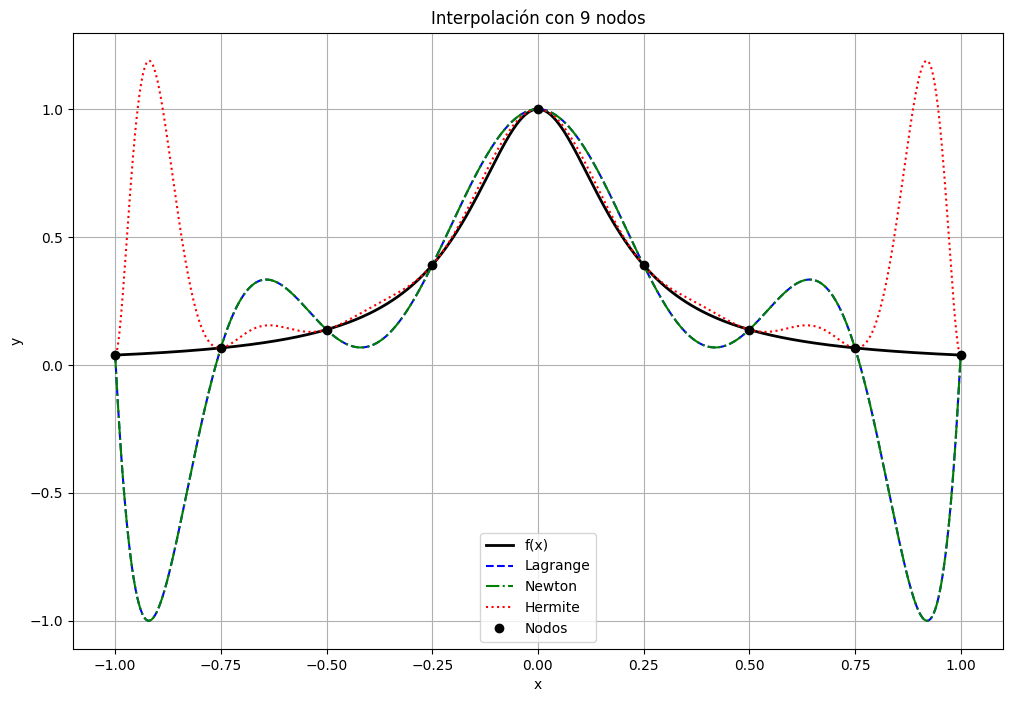

In [19]:
comparacion(9)